# Analysis on NVIDIA Stock Price Change on US Unemployment Rate (With S&P500 as a benchmark)
Over the past decade, AI has become one of the hottest sectors in the world. Companies are investing large amounts into AI infrastructure, which has created a large demand for NVIDIA products. As companies integrate more AI into their infrastructure, we expect them to replace certain jobs. Our hypothesis is that the increase in demand for NVIDIA products will lead to higher US unemployment. I am also planning to use the S&P 500 as a benchmark to measure the overall economy’s health to help with noise. 

In [10]:
import os
from config import fred_api_key, UNRATE_DATASET, SPY_DATASET, NVIDIA_DATASET, RESULTS_DIR
from load import get_fred_data, get_stock_data
from analyze import plot_statistics, plot_correlation_analysis
from process import process_fred_data, process_stock_data
from matplotlib import pyplot as plt

# FRED Data

In [11]:
# --- FRED Data ---
fred_raw_data = get_fred_data(UNRATE_DATASET, '2000-01-01', '2025-9-01', fred_api_key)
fred_processed_data = process_fred_data(fred_raw_data, 'Unemployment Rate')
fred_processed_data.head()


--- Extracting data from FRED: UNRATE ---
Extracting UNRATE...
--- Processing Unemployment Rate Dataset
Processing Unemployment Rate


,Date,Unemployment Rate
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0


In [15]:
plot_statistics(fred_processed_data, 'Unemployment Rate', color = '#555555', result_dir= RESULTS_DIR)

--- Plotting basic statistics for Unemployment Rate ---
Saved histogram for Unemployment Rate
Saved line plot for Date vs Unemployment Rate


# SPY Data

In [16]:
spy_raw_data = get_stock_data(SPY_DATASET, '2000-01-01', '2025-9-01', '1mo', True)
spy_processed_data  = process_stock_data(spy_raw_data, 'SPY')
spy_processed_data.head()

[*********************100%***********************]  1 of 1 completed

--- Extracting data from yfinance: SPY ---
Extracting SPY...
--- Processing SPY data---
Processing SPY...


,Date,Log Close Price
0,2000-01-01,4.479334
1,2000-02-01,4.463991
2,2000-03-01,4.553953
3,2000-04-01,4.520740
4,2000-05-01,4.504893


In [18]:
plot_statistics(spy_processed_data, 'SPY', color ='blue')

--- Plotting basic statistics for SPY ---
Saved histogram for Log Close Price
Saved line plot for Date vs Log Close Price


# NVIDIA Data

In [19]:
nvidia_raw_data = get_stock_data(NVIDIA_DATASET, '2000-01-01', '2025-9-01', '1mo', True)
nvidia_processed_data = process_stock_data(nvidia_raw_data, 'NVIDIA')
nvidia_processed_data.head()

--- Extracting data from yfinance: NVDA ---
Extracting NVDA...


[*********************100%***********************]  1 of 1 completed

--- Processing NVIDIA data---
Processing NVIDIA...


,Date,Log Close Price
0,2000-01-01,-2.647947
1,2000-02-01,-2.101678
2,2000-03-01,-1.823993
3,2000-04-01,-1.770519
4,2000-05-01,-1.523266


In [20]:
plot_statistics(nvidia_processed_data, 'NVIDIA', color ='#76B900')

--- Plotting basic statistics for NVIDIA ---
Saved histogram for Log Close Price
Saved line plot for Date vs Log Close Price


# Plot Correlation Analysis

--- Plotting statistics for NVIDIA Log Close Price and Unemployment Rate (%)---


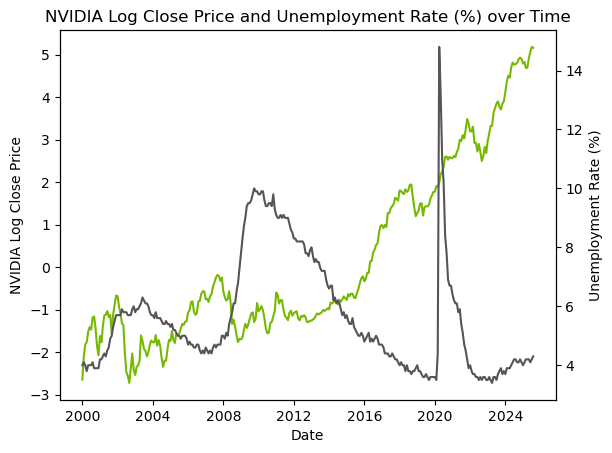

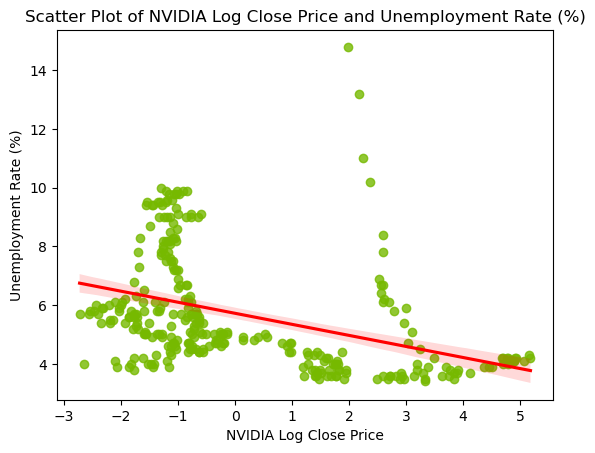

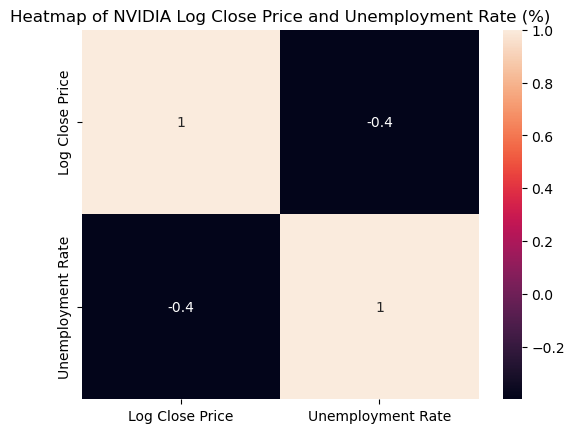

In [23]:
plot_correlation_analysis(nvidia_processed_data, fred_processed_data, '#76B900', '#555555', 'NVIDIA Log Close Price', 'Unemployment Rate (%)', notebook_plot=True)

--- Plotting statistics for NVIDIA Log Close Price and SPY Log Close Price---


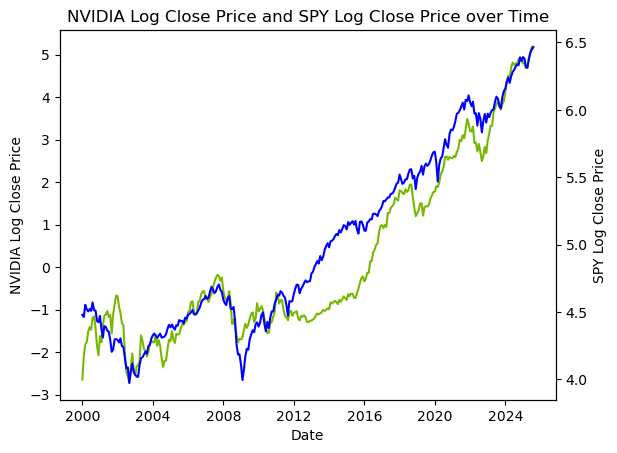

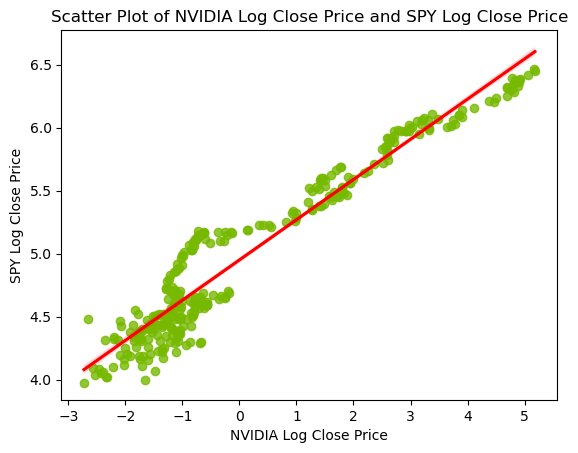

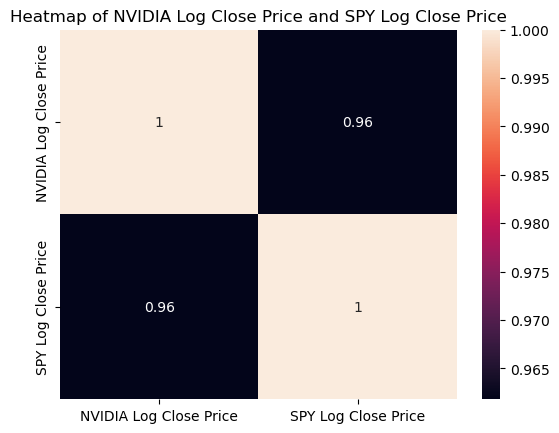

In [24]:
plot_correlation_analysis(nvidia_processed_data, spy_processed_data, '#76B900', 'blue', 'NVIDIA Log Close Price', 'SPY Log Close Price', notebook_plot=True)

--- Plotting statistics for SPY Log Close Price and Unemployment Rate (%)---


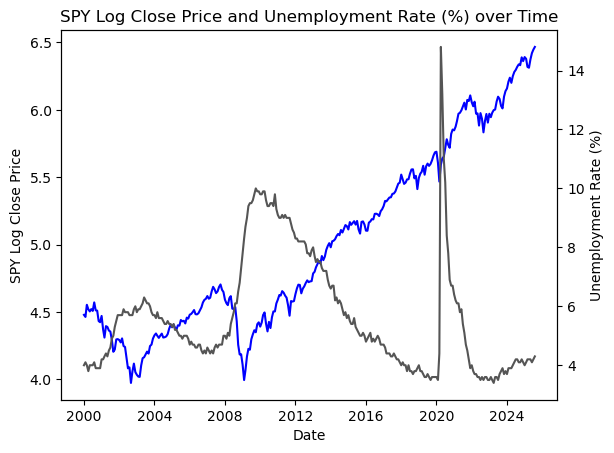

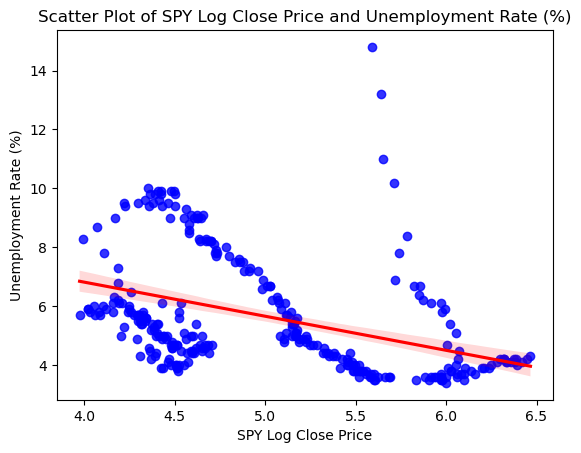

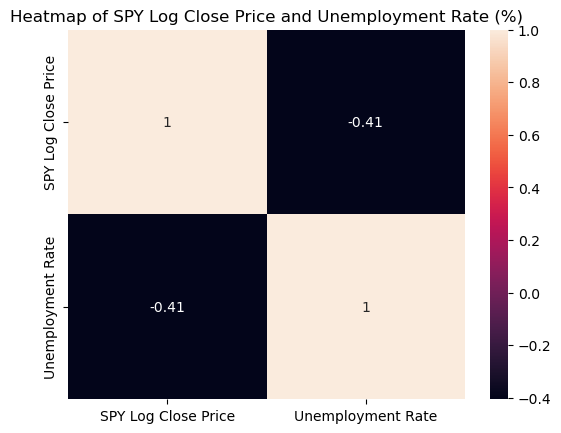

In [25]:
plot_correlation_analysis(spy_processed_data, fred_processed_data, 'blue', '#555555', 'SPY Log Close Price', 'Unemployment Rate (%)', notebook_plot= True)

--- Plotting statistics for NVIDIA Log Close Price and SPY Log Close Price and Unemployment Rate (%)---


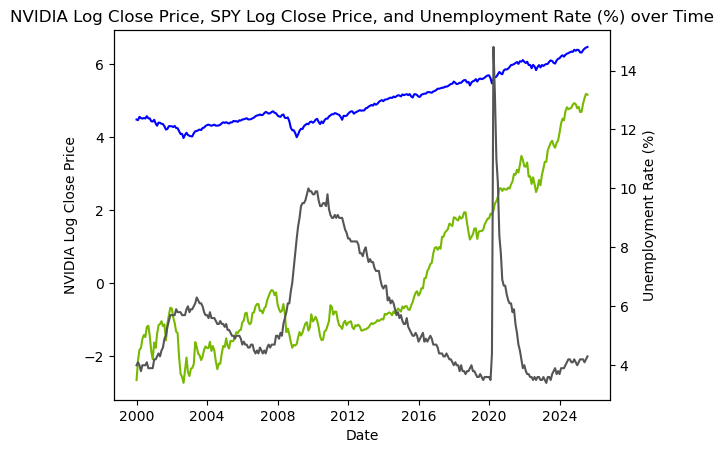

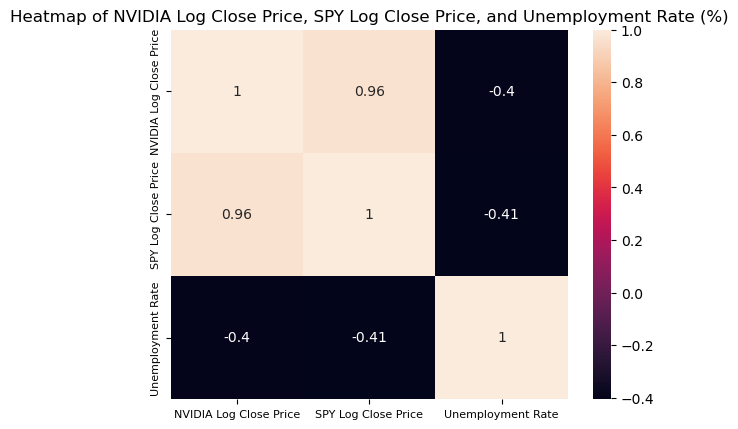

In [26]:
plot_correlation_analysis(nvidia_processed_data, spy_processed_data, '#76B900', 'blue', 'NVIDIA Log Close Price', 'SPY Log Close Price', fred_processed_data, '#555555', 'Unemployment Rate (%)', notebook_plot= True)

# Pre and Post Boom AI

In [15]:
fred_raw_data = get_fred_data(UNRATE_DATASET, '2015-01-01', '2025-9-01', fred_api_key)
fred_processed_data = process_fred_data(fred_raw_data, 'Unemployment Rate')
fred_processed_data.head()

--- Extracting data from FRED: UNRATE ---
Extracting UNRATE...
--- Processing Unemployment Rate Dataset
Processing Unemployment Rate


,Date,Unemployment Rate
0,2015-01-01,5.7
1,2015-02-01,5.5
2,2015-03-01,5.4
3,2015-04-01,5.4
4,2015-05-01,5.6


In [16]:
spy_raw_data = get_stock_data(SPY_DATASET, '2015-01-01', '2025-9-01', '1mo', True)
spy_processed_data  = process_stock_data(spy_raw_data, 'SPY')
spy_processed_data.head()

--- Extracting data from yfinance: SPY ---
Extracting SPY...


[*********************100%***********************]  1 of 1 completed

--- Processing SPY data---
Processing SPY...


,Date,Log Close Price
0,2015-01-01,5.112669
1,2015-02-01,5.167351
2,2015-03-01,5.147067
3,2015-04-01,5.161307
4,2015-05-01,5.174081


In [17]:
nvidia_raw_data = get_stock_data(NVIDIA_DATASET, '2015-01-01', '2025-9-01', '1mo', True)
nvidia_processed_data = process_stock_data(nvidia_raw_data, 'NVIDIA')
nvidia_processed_data.head()

--- Extracting data from yfinance: NVDA ---
Extracting NVDA...


[*********************100%***********************]  1 of 1 completed

--- Processing NVIDIA data---
Processing NVIDIA...


,Date,Log Close Price
0,2015-01-01,-0.774960
1,2015-02-01,-0.636104
2,2015-03-01,-0.684845
3,2015-04-01,-0.625935
4,2015-05-01,-0.629093


--- Plotting statistics for NVIDIA Log Close Price and SPY Log Close Price and Unemployment Rate (%)---


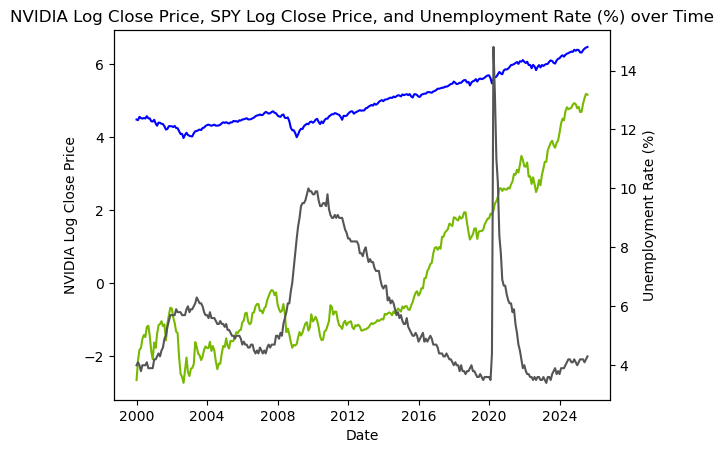

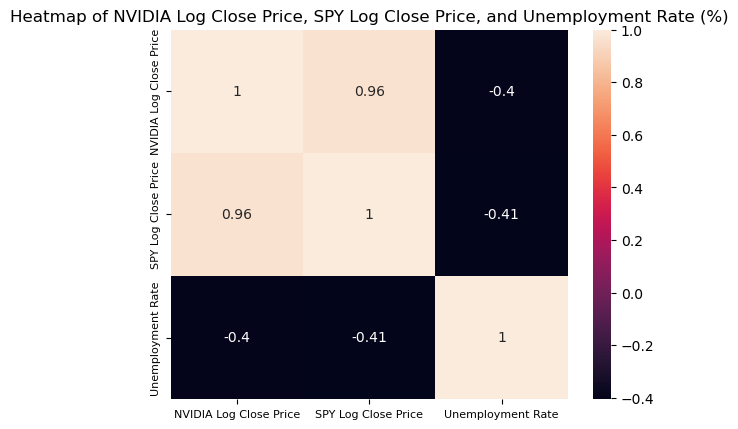

In [27]:
plot_correlation_analysis(nvidia_processed_data, spy_processed_data, '#76B900', 'blue', 'NVIDIA Log Close Price', 'SPY Log Close Price', fred_processed_data, '#555555', 'Unemployment Rate (%)', ai_boom= 'Post', notebook_plot=True)